##### Q. You are a data scientist working for a healthcare company, and you have been tasked with creating adecision tree to help identify patients with diabetes based on a set of clinical variables. You have beengiven a dataset (diabetes.csv) with the following variables:
1. Pregnancies: Number of times pregnant (integer)
2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (integer)
3. BloodPressure: Diastolic blood pressure (mm Hg) (integer)
4. SkinThickness: Triceps skin fold thickness (mm) (integer)
5. Insulin: 2-Hour serum insulin (mu U/ml) (integer)
6. BMI: Body mass index (weight in kg/(height in m)^2) (float)
7. DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes
based on family history) (float)
8. Age: Age in years (integer)
9. Outcome: Class variable (0 if non-diabetic, 1 if diabetic) (integer)

Here’s the dataset link: https://drive.google.com/file/d/1Q4J8KS1wm4-_YTuc389enPh6O-eTNcx2/view

Your goal is to create a decision tree to predict whether a patient has diabetes based on the other
variables. Here are the steps you can follow:

#### Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to
understand the distribution and relationships between the variables.

In [92]:
#### Ans:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#Importing the data
df = pd.read_csv("diabetes.csv",header=0)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [93]:
# Exploratory Data Analysis


In [94]:
# info aboy datset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [95]:
#Size of dataset
df.shape


(768, 9)

In [96]:
#Describing dataset parameters
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [97]:
#Checking columns name
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [98]:
# number of unique values in variables
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [99]:
# The classes of the outcome variable
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [100]:
# %distribution of the Outcome variable
df["Outcome"].value_counts()*100/len(df)

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

In [101]:
# checking duplicate values in dataset
df.duplicated().sum()

0

In [102]:
#checking null values in dataset
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [103]:
#checking 0 values in dataset
(df[df.columns] == 0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [104]:
#Replacing 0 values with median
for i in ["Glucose","BMI","Insulin","BloodPressure"]:
    df[i].replace({0:df[i].median()},inplace = True)


In [105]:
#Again checking 0 values in dataset
(df[df.columns] == 0).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness               227
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [106]:
#### Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical variables into dummy variables if necessary.

<Axes: >

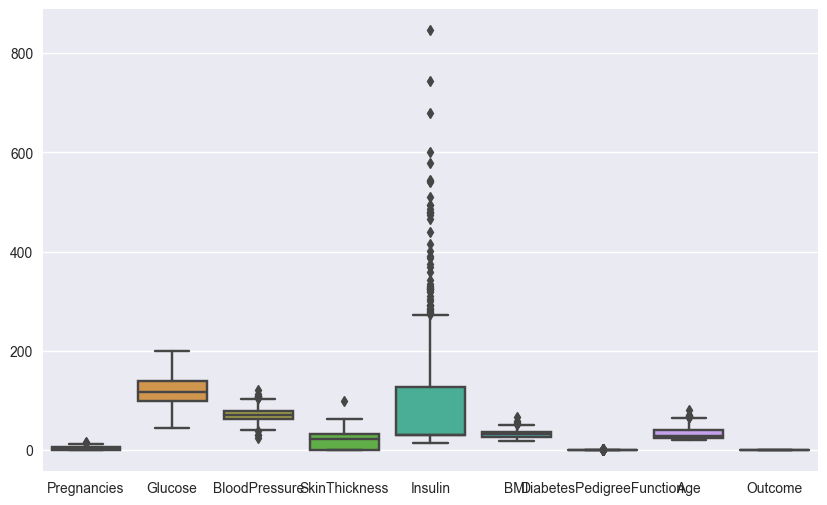

In [107]:
#Boxplot
plt.figure(figsize=(10,6))
sns.boxplot(df)

In [108]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [109]:
#Removing outliners
def outlier_treatment():
    col = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']
    for i in col:
        x = np.quantile(df[i],[0.25,0.75])
        iqr = x[1]-x[0]
        uw = x[1]+1.5*iqr
        lw = x[0]-1.5*iqr
        df[i]  = np.where(df[i]>uw,uw,(np.where(df[i]<lw,lw,df[i])))
        
outlier_treatment()

<Axes: >

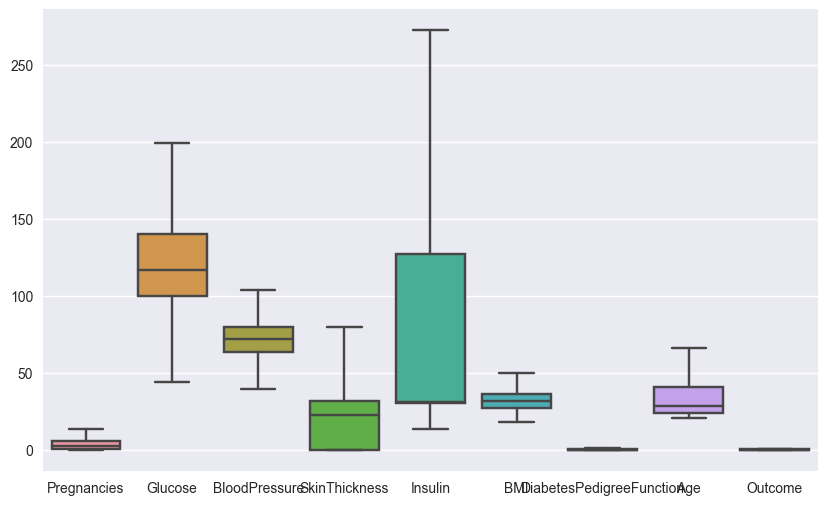

In [110]:
#Boxplot
plt.figure(figsize=(10,6))
sns.boxplot(df)

<Axes: >

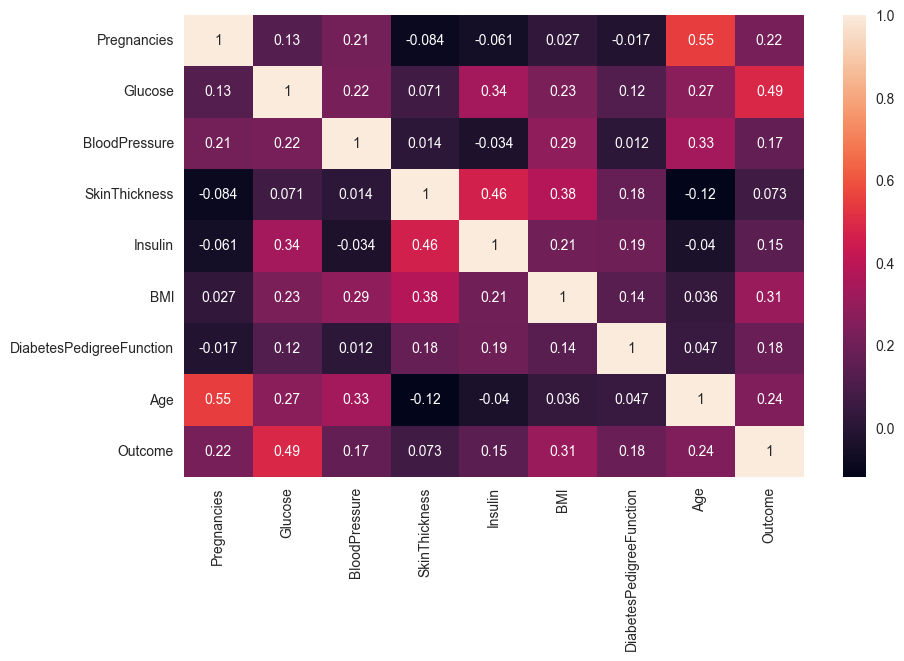

In [111]:
# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

In [112]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.126856,0.210906,-0.084349,-0.061192,0.027145,-0.017398,0.549695,0.220392
Glucose,0.126856,1.000000,0.220199,0.071090,0.338429,0.233953,0.118457,0.268912,0.492782
BloodPressure,0.210906,0.220199,1.000000,0.013501,-0.033847,0.286410,0.012305,0.332898,0.168971
SkinThickness,-0.084349,0.071090,0.013501,1.000000,0.464759,0.382740,0.177920,-0.119170,0.073125
Insulin,-0.061192,0.338429,-0.033847,0.464759,1.000000,0.207474,0.191870,-0.040448,0.147295
BMI,0.027145,0.233953,0.286410,0.382740,0.207474,1.000000,0.138541,0.035861,0.313030
DiabetesPedigreeFunction,-0.017398,0.118457,0.012305,0.177920,0.191870,0.138541,1.000000,0.047289,0.184969
Age,0.549695,0.268912,0.332898,-0.119170,-0.040448,0.035861,0.047289,1.000000,0.242702
Outcome,0.220392,0.492782,0.168971,0.073125,0.147295,0.313030,0.184969,0.242702,1.000000


In [113]:
df.corr()['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.492782
BMI                         0.313030
Age                         0.242702
Pregnancies                 0.220392
DiabetesPedigreeFunction    0.184969
BloodPressure               0.168971
Insulin                     0.147295
SkinThickness               0.073125
Name: Outcome, dtype: float64

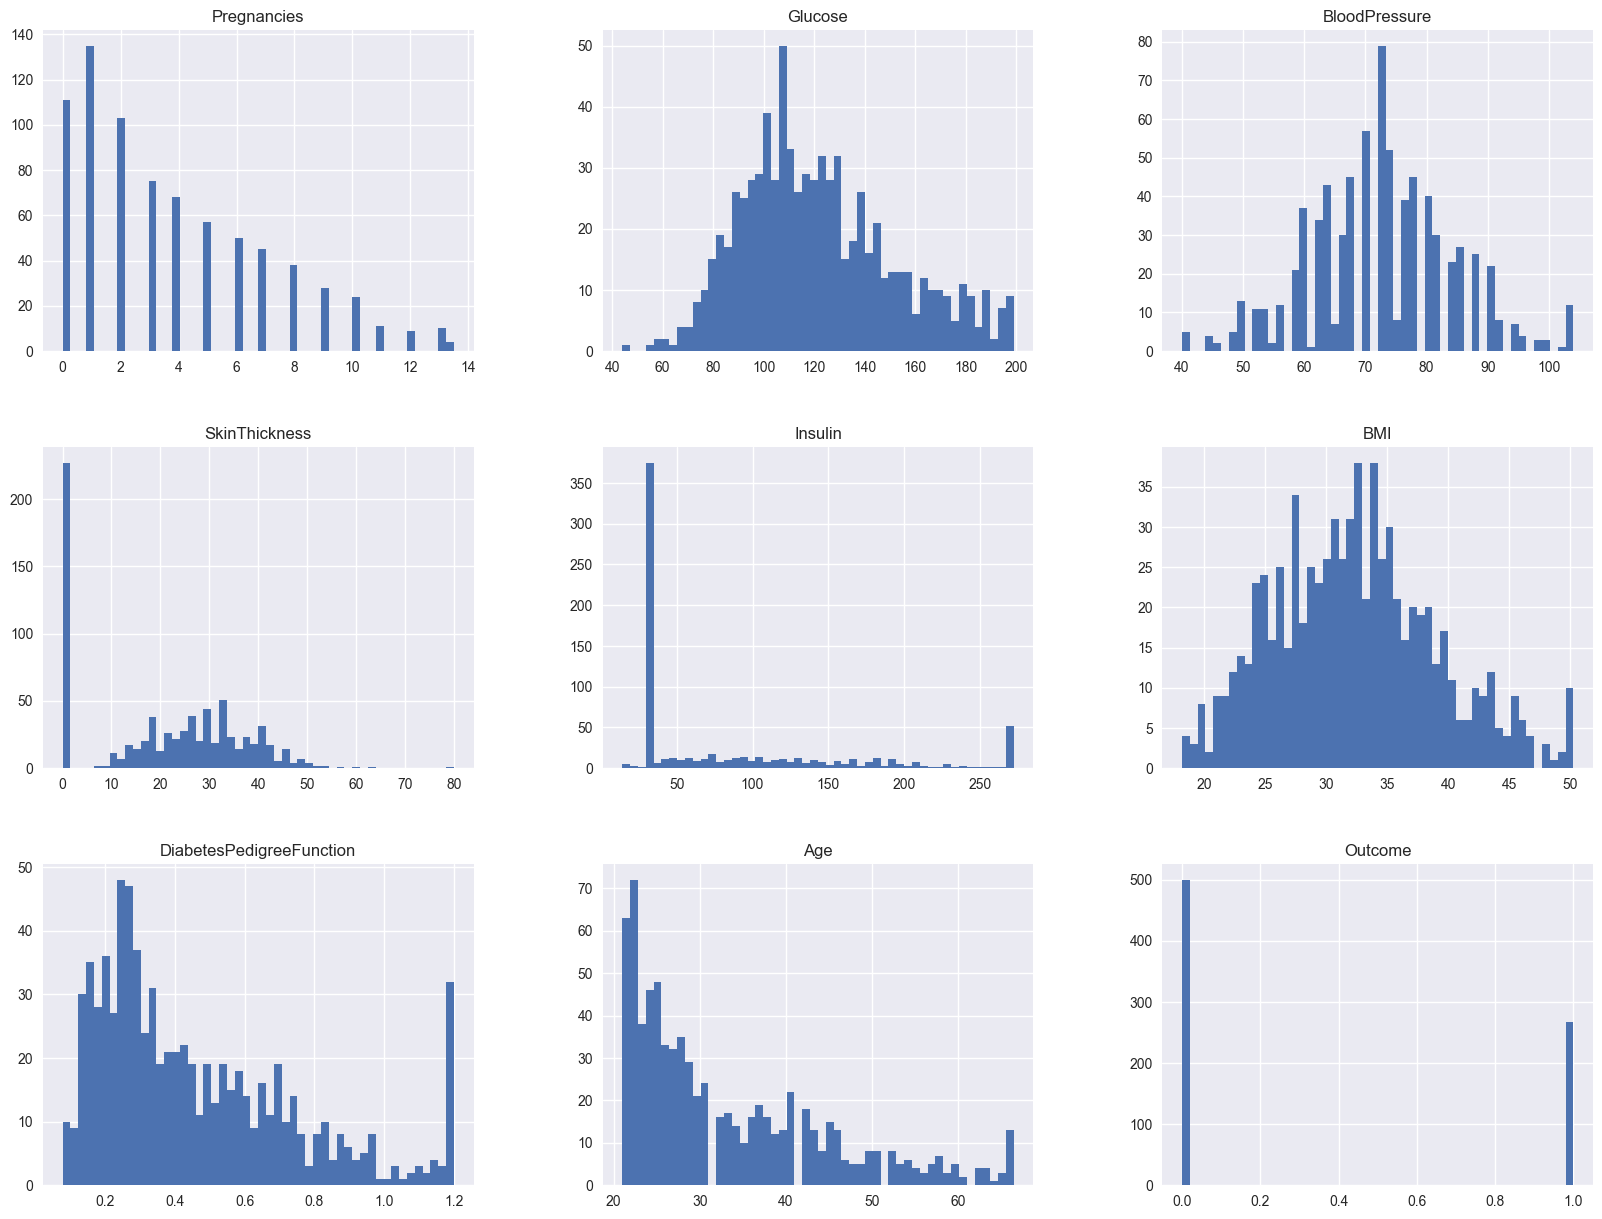

In [114]:
## Plot desnity plot for all features
plt.style.use('seaborn')
df.hist(bins=50,figsize=(20,15))
plt.show()

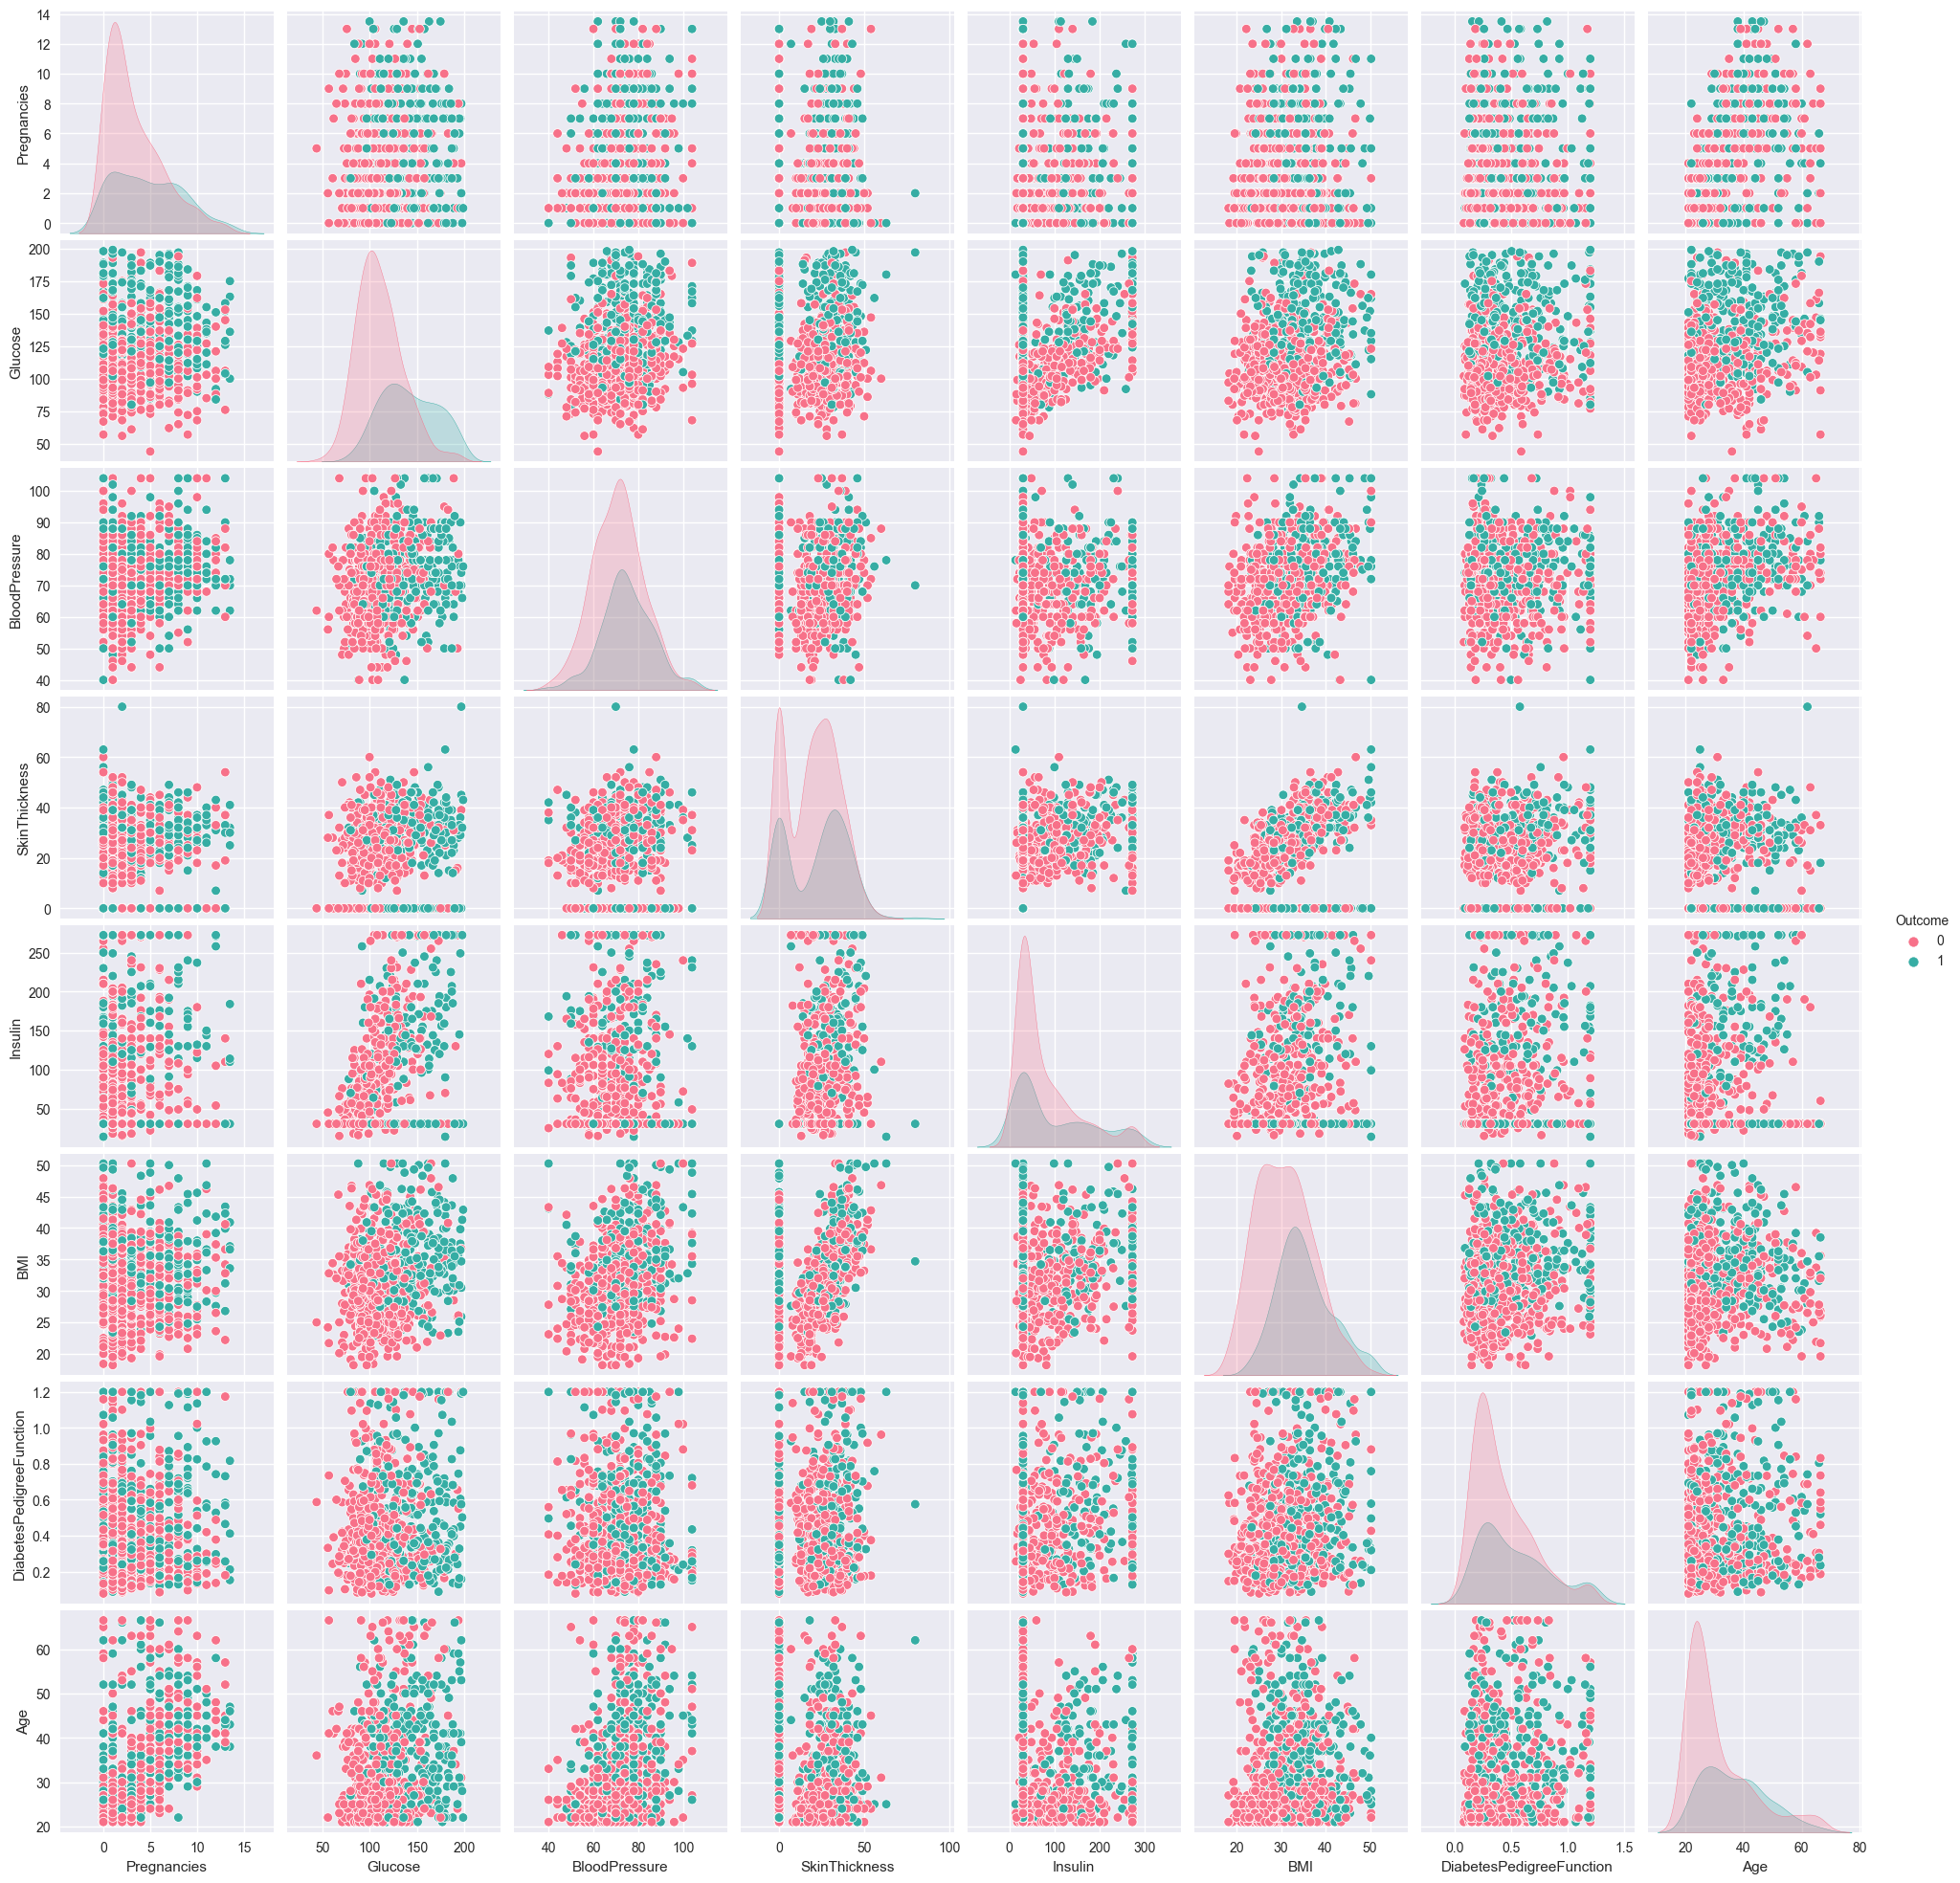

In [115]:
## Plot Pair plot for all features
sns.pairplot(df,hue= "Outcome",palette="husl")

##### Result:

1. high Glucose level in pregnanci increase the risk of diabetes.

2. BMI Above 30 and high level of Glucose togather increase the risk of diabetes.

3. we can see here that increasing Glucose level is the key factor which increase the risk of diabetes.

4. High Glucose level along with other variables increase the risk of diabetes.

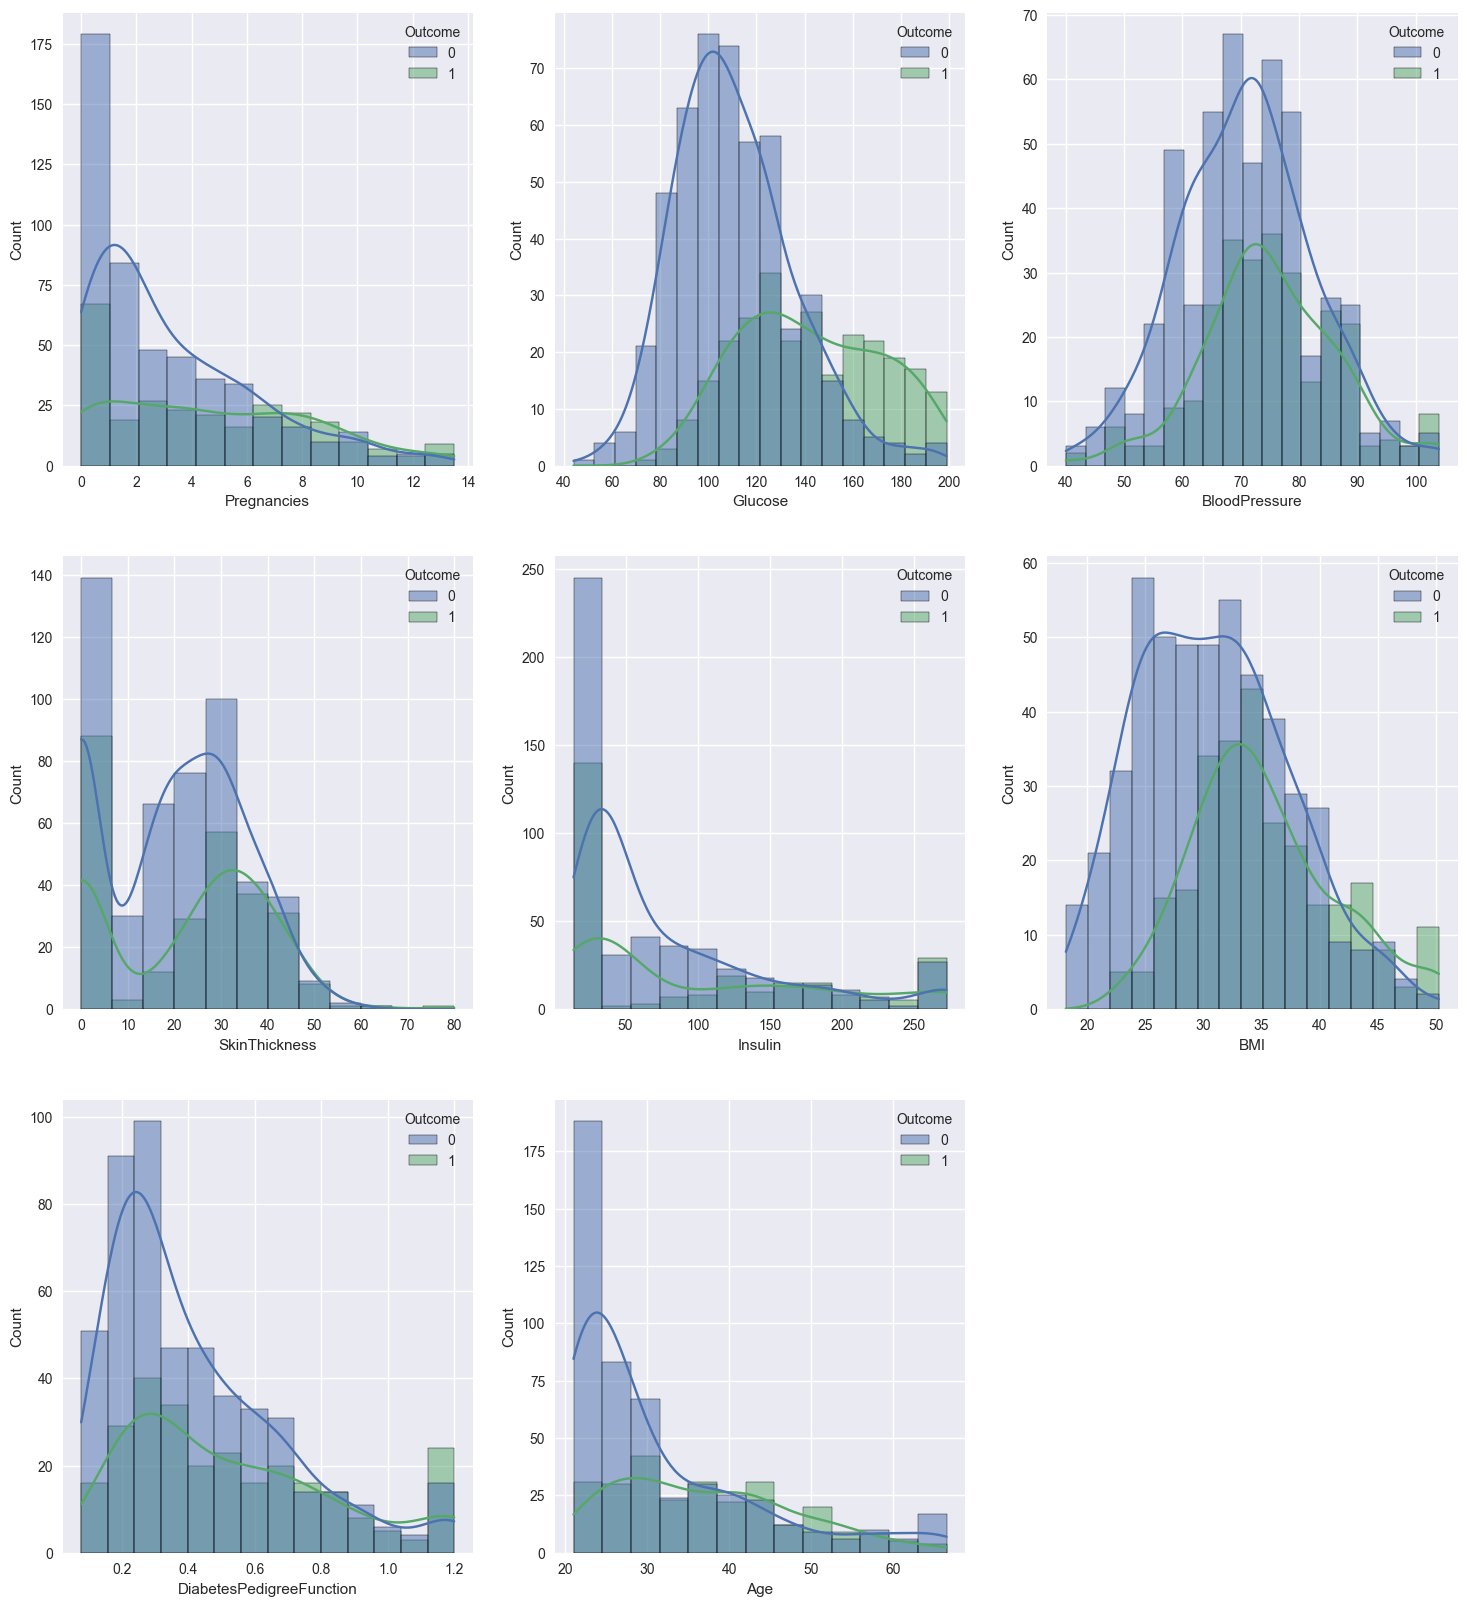

In [116]:
# Histplot of dataset - variables relation with Outcome
Pltnum = 1
plt.figure(figsize=(18,20))
for i in df.columns:
        if Pltnum<9:
            plt.subplot(3,3,Pltnum)
            ax = sns.histplot(data = df , x = i , hue = df.Outcome , kde = True);
            plt.xlabel(i)
            Pltnum+=1

#### Result:

1. when the number of pregnancies increases the risk of diabetes also increase.

2. when the level of Glucose increase above 140 the risk of diabetes also increase.

3. blood pressure between 60 to 90 have more diabetic people then other rate.

4. risk of diabetes increase when skin thickness increase.

5. insulin level affect diabetes when its level increase the risk of diabetes also increase.

6. when BMI increase above 30 the risk of diabetes also increase.

7. risk of diabetes increase when age increase.

<Axes: xlabel='Outcome', ylabel='count'>

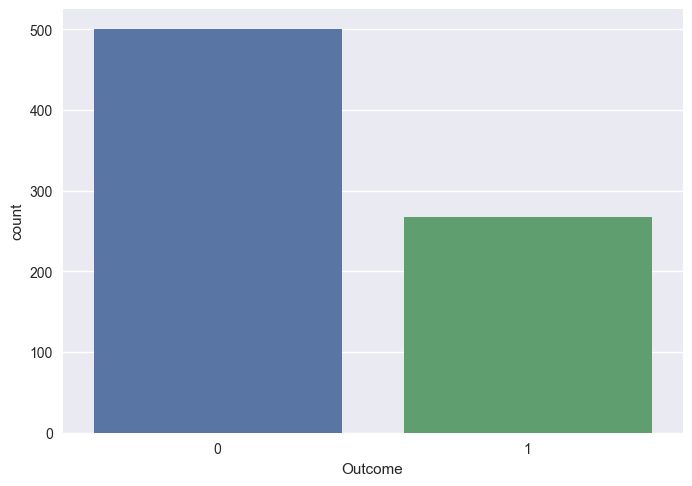

In [117]:
# Output Varaible Distribution
#count Plot
sns.countplot(x='Outcome',data=df)

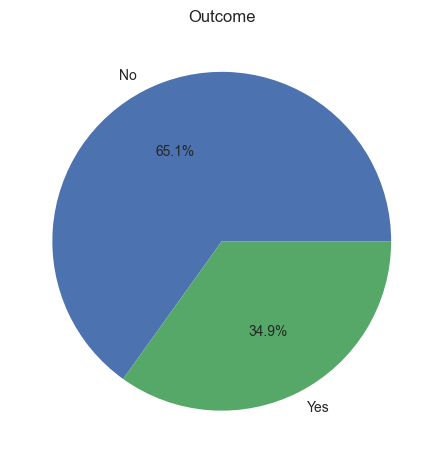

In [118]:
#Pie chart
plt.title('Outcome')
plt.pie(df['Outcome'].value_counts(),labels=['No','Yes'], autopct='%1.1f%%')
plt.show()

In [119]:
#### Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

In [120]:
df.shape

(768, 9)

In [121]:

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
 
# Load the dataset
diabetes_data = df
# Separate features and target variable
X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

X_train.shape, X_test.shape, y_train.shape, y_test.shape




((614, 8), (154, 8), (614,), (154,))

In [122]:
SS = StandardScaler()
x_train = SS.fit_transform(X_train)
x_test = SS.fit_transform(X_test)


In [123]:
classifier=DecisionTreeClassifier(criterion='gini',splitter='best',random_state=0)


In [124]:
cross_val_score(classifier, X, y, cv=10)

array([0.66233766, 0.74025974, 0.64935065, 0.5974026 , 0.62337662,
       0.7012987 , 0.79220779, 0.72727273, 0.63157895, 0.77631579])

In [125]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [126]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
727,0.0,141.0,84.0,26.0,30.5,32.4,0.433,22.0
327,10.0,179.0,70.0,0.0,30.5,35.1,0.200,37.0
721,1.0,114.0,66.0,36.0,200.0,38.1,0.289,21.0
210,2.0,81.0,60.0,22.0,30.5,27.7,0.290,25.0
683,4.0,125.0,80.0,0.0,30.5,32.3,0.536,27.0


[Text(0.5681061921296297, 0.9642857142857143, 'x[1] <= 143.5\ngini = 0.458\nsamples = 614\nvalue = [396, 218]'),
 Text(0.2212818287037037, 0.8928571428571429, 'x[5] <= 27.35\ngini = 0.365\nsamples = 474\nvalue = [360, 114]'),
 Text(0.041666666666666664, 0.8214285714285714, 'x[1] <= 128.5\ngini = 0.058\nsamples = 135\nvalue = [131, 4]'),
 Text(0.018518518518518517, 0.75, 'x[5] <= 26.95\ngini = 0.017\nsamples = 115\nvalue = [114, 1]'),
 Text(0.009259259259259259, 0.6785714285714286, 'gini = 0.0\nsamples = 111\nvalue = [111, 0]'),
 Text(0.027777777777777776, 0.6785714285714286, 'x[3] <= 8.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.018518518518518517, 0.6071428571428571, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.037037037037037035, 0.6071428571428571, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.06481481481481481, 0.75, 'x[1] <= 129.5\ngini = 0.255\nsamples = 20\nvalue = [17, 3]'),
 Text(0.05555555555555555, 0.6785714285714286, 'gini = 0.0\nsamples = 1\nvalue 

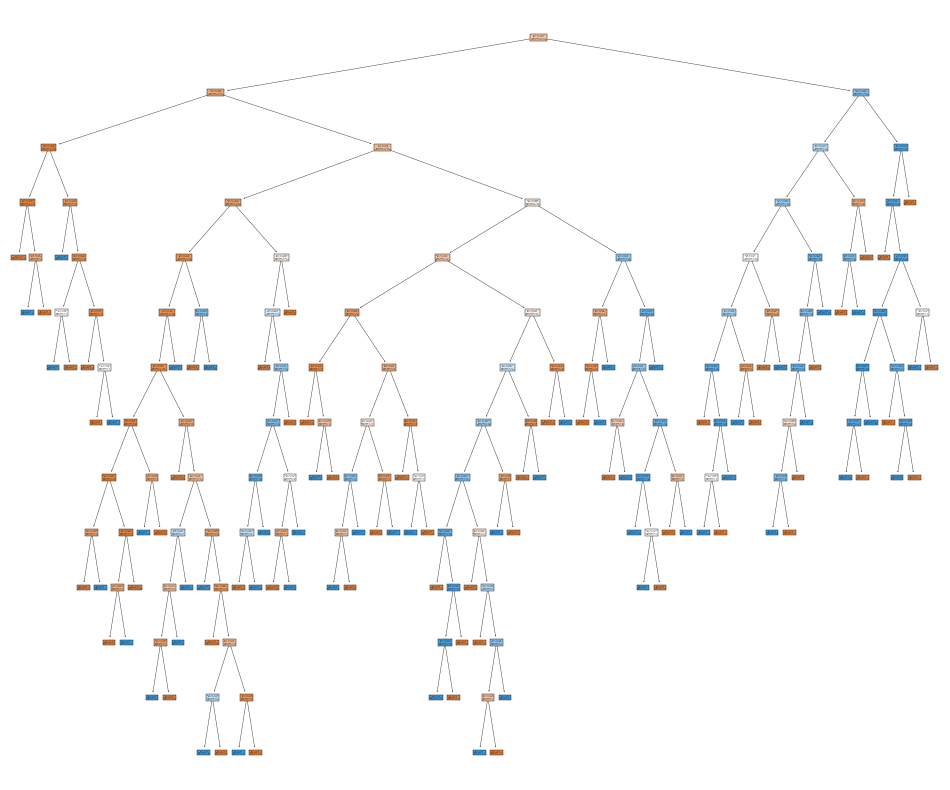

In [127]:
from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(classifier,filled=True)

In [128]:
##prediction
y_pred=classifier.predict(X_test)

In [129]:
y_pred

array([1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0],
      dtype=int64)

In [130]:
# Evaluation of Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc


In [131]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)


Accuracy:  0.6753246753246753
Precision:  0.5
Recall:  0.56
F1 Score:  0.5283018867924528


In [132]:
# Create confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)


Confusion Matrix:
[[76 28]
 [22 28]]


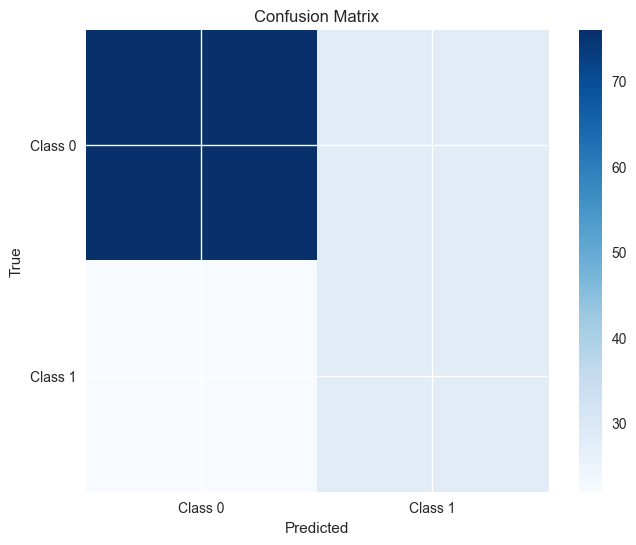

In [133]:
# Visualize the confusion matrix:
plt.figure(figsize=(8, 6))
plt.imshow(confusion_mat, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['Class 0', 'Class 1'])
plt.yticks([0, 1], ['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


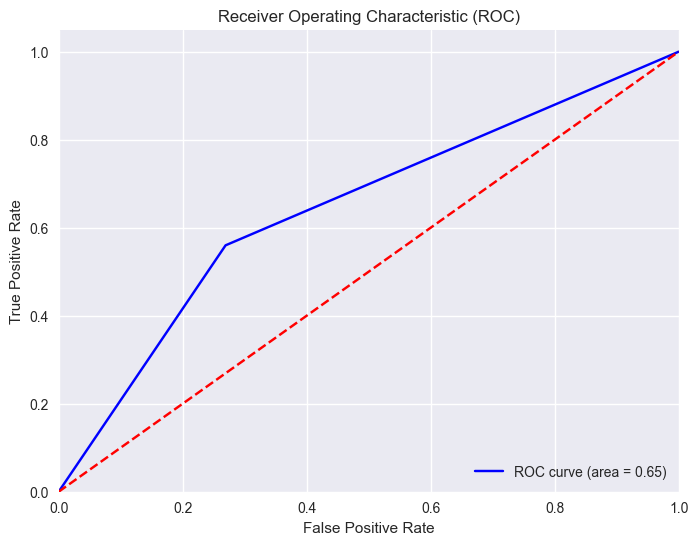

In [134]:
# Create an ROC curve and calculate the area under the curve (AUC):
# Assuming the decision tree model outputs class probabilities
y_pred_prob = classifier.predict_proba(X_test)[:, 1]  # Positive class probabilities

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()
